# Current Population Survey KNearest Classification

Predict whether an individuals family income is $50,000 or greater. Then predict whether an individual is married.

We are using only the numerical columns as predictors, along with the column 'ismarried' (binary) when predicting family income.

In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
%matplotlib inline

In [2]:
# Import dataset
data = pd.read_csv("../datasets/CPS2016_UPDATE.csv",
                  usecols=['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'ismarried', 'fam_income', 'faminc_50'])

# We are going to use the entire dataset for this model
# to test on a smaller sample uncomment below
# data = data.sample(n=1000)

# Apply 80/20 training/testing split
# Results may vary each time the data is split

data_train, data_test = train_test_split(data, test_size=0.2)
data.head()

,age,weekly_hrs,educ,fam_income,num_in_house,num_child,ismarried,faminc_50
0,28,40,11,11,6,4,0,0
1,44,50,13,16,5,2,1,1
2,23,20,9,14,3,0,0,1
3,20,20,7,9,5,0,0,0
4,20,20,9,13,4,0,0,1


In [3]:
# Function to plot binary categories
def getColor(arr):
    colorList = [];
    for x in arr:
        color = "magenta" if x == 1 else "green"
        colorList.append(color)
    return colorList;     

# Function to display scores at each increasing k-neighbors
# Using 5-fold cross validation
def getKNearestCVScores(X, Y):
    nb = np.arange(1,25)
    scorelist = []
    for d in nb:
        T = neighbors.KNeighborsClassifier(n_neighbors=d)
        scores = cross_val_score(T, X, Y, 
                                 cv=KFold(shuffle=True, n_splits=5), n_jobs=-1)
        scorelist.append(scores.mean())
        print(f"{d}:\t{scores.mean()}")
    
    print("max score: ", max(scorelist))
    print("neighbors =", scorelist.index(max(scorelist)) + 1)
    
# Function to display scores at each increasing k-neighbors
# using split data, returns graph
def getKNearestScores(X, Y, xTest, yTest):
    depth = np.arange(1,25)
    score_train = []
    score_test = []
    print("Training", "   ", "Testing")
    for d in depth:
        T = neighbors.KNeighborsClassifier(n_neighbors=d)
        T.fit(X,Y)
        s_train = T.score(X, Y)
        s_test = T.score(xTest, yTest)
        print(f"{d}:\t{s_train}:\t{s_test}")
        score_train.append(s_train)
        score_test.append(s_test)
    
    fig,ax = plt.subplots(1, figsize=(6,6), dpi=100)
    ax.plot(depth, score_train, label="training data")
    ax.plot(depth, score_test, label="testing data")
    ax.set_xlabel("neighbors")
    ax.set_ylabel("R2 score")
    fig.legend()
    plt.show() 
    
# function to plot KNearest neighbors prediction with 2 input variables
def plotKNearestTwoVars(x, y, target, nb):
    colorList = getColor(data_train[target])
    T2 = neighbors.KNeighborsClassifier(n_neighbors=nb)
    T2.fit(data_train[[x,y]],data_train[target])

    x_min, x_max = 10, 90
    y_min, y_max = 0, 18
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150),
                         np.linspace(y_min, y_max, 150))
    test = pd.DataFrame({'x1': xx.ravel(), 'x2': yy.ravel()})

    # Evaluate model
    colorPredict = getColor(T2.predict(test[['x1','x2']])) 

    fig,ax = plt.subplots(figsize=(8,8), dpi=100)
    ax.scatter(test['x1'], test['x2'], color=colorPredict, alpha=0.05)
    ax.scatter(data_train[x], data_train[y],  color=colorList, s=20, alpha=.2)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("neighbors= " + str(nb))
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show(fig)   

# Predict if Family Income >50,000
First, lets try using KNearest Classification with only two input variables, 'age' and 'education' to predict if the family income is less than $50,000.

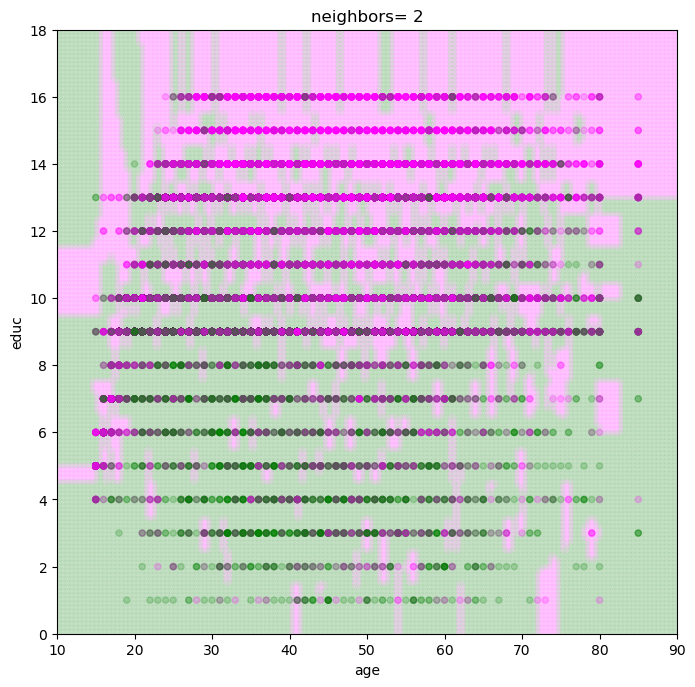

In [4]:
plotKNearestTwoVars('age', 'educ', 'faminc_50', 2)       

# Score the model

We are going to score the model on a range of 1-24 nearest neighbors, first with split data then using using cross-validation.

Training     Testing
1:	0.611940636170309:	0.6076373178897837
2:	0.5597031808515451:	0.5553343588815491
3:	0.6430025790688204:	0.6341507555877296
4:	0.6214198452558708:	0.6101710252465841
5:	0.6598570200443419:	0.6488100624377884
6:	0.6462377267996923:	0.6338792869423582
7:	0.6690873716121443:	0.6593973396072753
8:	0.6615311524365414:	0.6527011130214461
9:	0.6808741685896565:	0.6714324495520767
10:	0.6716438170218542:	0.6655506289023618
11:	0.6813945070358808:	0.6741471360057913
12:	0.675897018234469:	0.6697131481313908
13:	0.6838830822134745:	0.681024341688535
14:	0.6787475679833491:	0.6755949687811058
15:	0.6854893443735578:	0.680481404397792
16:	0.6783629700013574:	0.6742376255542485
17:	0.6890185964435999:	0.6834675594968781
18:	0.6853762273200308:	0.677495249298706
19:	0.6901723903895751:	0.6859107773052212
20:	0.6862359169268359:	0.6803909148493349
21:	0.6922537441744717:	0.6868156727897928
22:	0.6887697389258405:	0.6860917564021356
23:	0.6920048866567123:	0.6890779115012217
24:	

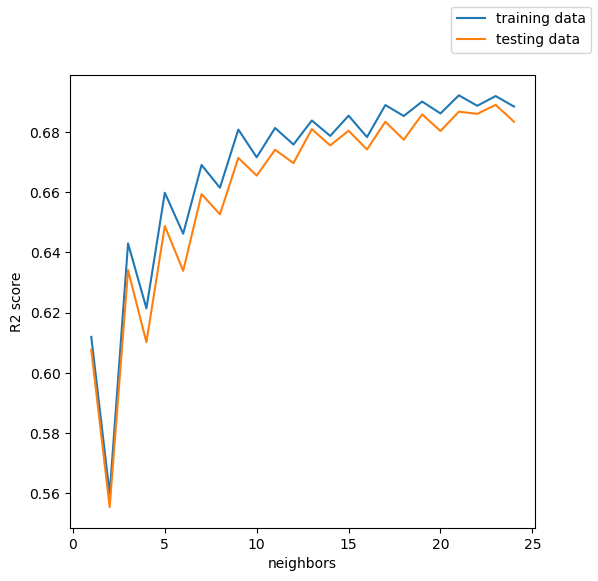

In [5]:
# Score using two input variables
getKNearestScores(data_train[['age','educ']], data_train['faminc_50'],
                  data_test[['age','educ']], data_test['faminc_50'])

In [6]:
# Score using two input variables with cross validation
getKNearestCVScores(data[['age','educ']], data['faminc_50'])

1:	0.6183378896117588
2:	0.5653266210015186
3:	0.6372143517242763
4:	0.6107358863942617
5:	0.6591496111610873
6:	0.6390243064754075
7:	0.6613760242004265
8:	0.6552584983402743
9:	0.6654661616176092
10:	0.6572676201781047
11:	0.6713300907229376
12:	0.6588239847256918
13:	0.6736466379038198
14:	0.6667691243109385
15:	0.678587745585973
16:	0.6684160553845171
17:	0.6775196806578794
18:	0.6758364866143027
19:	0.6816644295411934
20:	0.6777007187163095
21:	0.6843067800420183
22:	0.6753478545173734
23:	0.684759393204112
24:	0.6805603997263202
max score:  0.684759393204112
neighbors = 23


The model score peaked at around .6789 accuracy where n=19 neighbors.

We are going to add the rest of the numerical variables (and 'ismarried' binary variable) as inputs (besides fam_income, because this is a numerical representation of family income) to predict if the family income is over $50,000.

Training     Testing
1:	0.832632007601466:	0.6702560854221338
2:	0.7515949504547306:	0.6317980273278436
3:	0.7869100945658567:	0.6974029499592796
4:	0.7611646531831139:	0.6775857388471631
5:	0.7750101805348174:	0.7113383404216813
6:	0.7636758517714131:	0.7037372183512804
7:	0.7682910275553142:	0.7163152655868247
8:	0.7629292792181349:	0.7134196000361959
9:	0.7640830731641102:	0.7192109311374536
10:	0.7607800552011221:	0.7174916297167677
11:	0.7599429890050224:	0.7210207221065967
12:	0.7578390118094204:	0.7180345670075107
13:	0.7558933984887561:	0.7224685548819111
14:	0.7548074747748971:	0.7238258981087684
15:	0.7555314239174697:	0.7239163876572255
16:	0.7537894212931542:	0.7237354085603113
17:	0.7517080675082576:	0.7238258981087684
18:	0.7519116782046061:	0.7248212831417972
19:	0.75071263743722:	0.7273549904985974
20:	0.7494231030270123:	0.7275359695955117
21:	0.7470928917243563:	0.7290742919192833
22:	0.7477263472241075:	0.728893312822369
23:	0.7456676168499163:	0.729436250113112
24:	

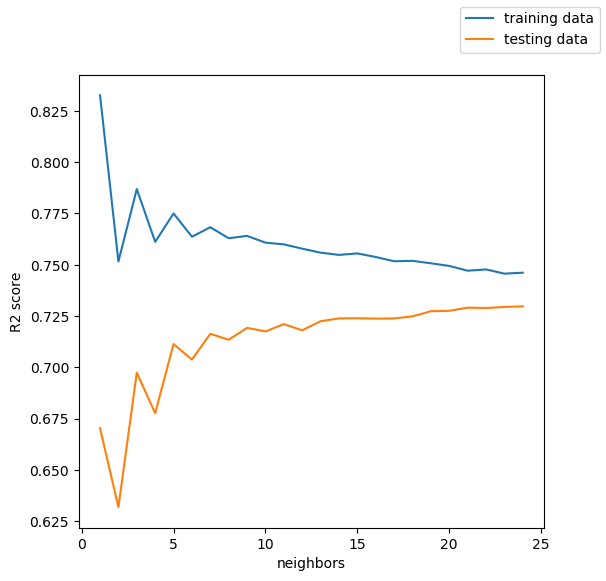

In [7]:
# Score with all numerical variables 
getKNearestScores(data_train[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'ismarried']], data_train['faminc_50'],
                  data_test[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'ismarried']], data_test['faminc_50'])

In [8]:
# Score with all numerical variables w/ cross validation
getKNearestCVScores(data[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'ismarried']], data['faminc_50'])

1:	0.6510054043961542
2:	0.610301805164128
3:	0.6879446007425056
4:	0.6682351696433361
5:	0.701735674706042
6:	0.6919623972933389
7:	0.7105495794692727
8:	0.7037084795258184
9:	0.7160697711269552
10:	0.7099162246941473
11:	0.7174269947929611
12:	0.7160153316319114
13:	0.7212459469076118
14:	0.7190198172111121
15:	0.720123878144563
16:	0.7212640333525641
17:	0.7228385613226378
18:	0.7229472454121594
19:	0.7237978340650975
20:	0.7241234621383132
21:	0.7232547952295221
22:	0.7255353693345251
23:	0.7243770048450806
24:	0.7248294165553291
max score:  0.7255353693345251
neighbors = 22


Using the variables seen above, the score for "family income greater than $50,000" peaked at .7178 where n=23 neighbors.

Decision Tree Classification is slightly more effective than KNearest Neighbors when predicting if the family income is greater than 50,000. 
- (K Nearest Score) .7178 < (Decision Tree Score) .74

# Predict if Individual is Married

First, lets try using KNearest Classification with only two input variables, 'age' and 'education' to predict if an individual is married.

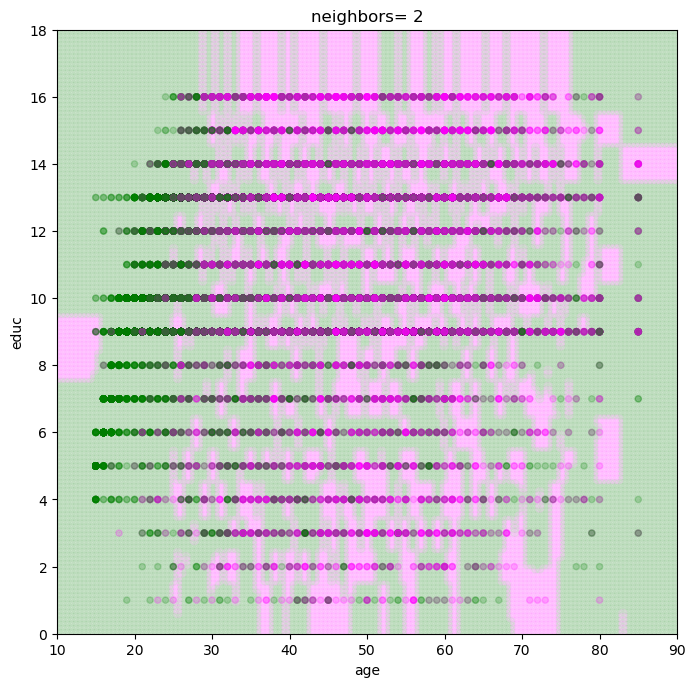

In [9]:
plotKNearestTwoVars('age', 'educ', 'ismarried', 2)  

# Score the model

We are going to score the model on a range of 1-24 nearest neighbors, first with split data then using using cross-validation.

Training     Testing
1:	0.603411610334374:	0.601303049497783
2:	0.5734808379711325:	0.5746086327029228
3:	0.6435907877471607:	0.6333363496516152
4:	0.6154698882403511:	0.6075468283413266
5:	0.6643138319533053:	0.6519771966337888
6:	0.6432514365865798:	0.636141525653787
7:	0.6649020406316456:	0.6556872681205321
8:	0.6516673453689878:	0.6442855850149308
9:	0.67766164426949:	0.6678128676137907
10:	0.6630016741323922:	0.6506198534069315
11:	0.6801954662684946:	0.6631074110940186
12:	0.6681824351839283:	0.6548728621844176
13:	0.6817564816071671:	0.6684462944529906
14:	0.6765530971449256:	0.6618405574156185
15:	0.6843129270168771:	0.6725183241335626
16:	0.682208949821275:	0.6678128676137907
17:	0.687208723587168:	0.6750520314903629
18:	0.6837473417492421:	0.669803637679848
19:	0.6896972987647618:	0.6764998642656773
20:	0.6813266368037645:	0.6697131481313908
21:	0.6884982579973756:	0.6775857388471631
22:	0.6861454232840143:	0.6746900732965343
23:	0.6938826297452604:	0.6827436431092209
24:	0.6

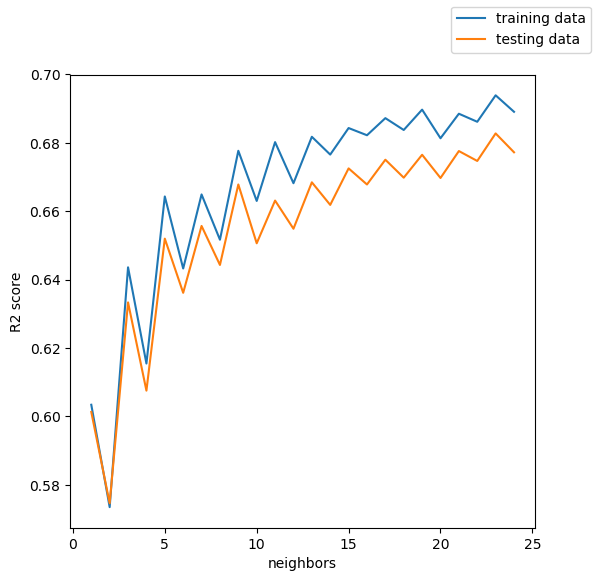

In [10]:
# Score using two input variables
getKNearestScores(data_train[['age','educ']], data_train['ismarried'],
                  data_test[['age','educ']], data_test['ismarried'])

In [11]:
# Score using 2 input variables with cross validation
getKNearestCVScores(data[['age','educ']], data['ismarried']) 

1:	0.597216318745954
2:	0.5602957444116562
3:	0.6221201742149007
4:	0.599931236132272
5:	0.6384448965737217
6:	0.6176679524917587
7:	0.6531954529206627
8:	0.6382643220183182
9:	0.6560729910808425
10:	0.6470418851961964
11:	0.6636201191432073
12:	0.6569416268710556
13:	0.6699729882556031
14:	0.6638915091732244
15:	0.6715472705526946
16:	0.6678915190001438
17:	0.6750945640348676
18:	0.6686875633375657
19:	0.6767958805554338
20:	0.6751668868851983
21:	0.6811936709726316
22:	0.6732485969001802
23:	0.681085153940738
24:	0.6775558928554611
max score:  0.6811936709726316
neighbors = 21


We are going to add the rest of the numerical variables as inputs to predict whether the individual is married.

Training     Testing
1:	0.9365865797927696:	0.7328748529544837
2:	0.8539658838966563:	0.7129671522939101
3:	0.8627211438396453:	0.7593882906524296
4:	0.8416813718836251:	0.750701294000543
5:	0.8398714990271934:	0.7725092751787168
6:	0.8305732772272748:	0.7656320694959732
7:	0.8265689335324193:	0.7715138901456882
8:	0.8224288493733315:	0.7733236811148312
9:	0.8182208949821275:	0.7735951497602027
10:	0.8166598796434551:	0.7754954302778029
11:	0.812904393466359:	0.7762193466654601
12:	0.811252884484865:	0.7778481585376888
13:	0.8077462558255283:	0.7781196271830604
14:	0.8080403601646984:	0.7764003257623745
15:	0.8037645355413782:	0.7781196271830604
16:	0.8051898104158183:	0.7776671794407746
17:	0.801932039274241:	0.7786625644738032
18:	0.8031084566309217:	0.7773957107954031
19:	0.8004388941676848:	0.7760383675685458
20:	0.8017284285778924:	0.7788435435707176
21:	0.7983575403827881:	0.7771242421500316
22:	0.7998506854893443:	0.779115012216089
23:	0.7968417718655264:	0.7777576689892317
24:	

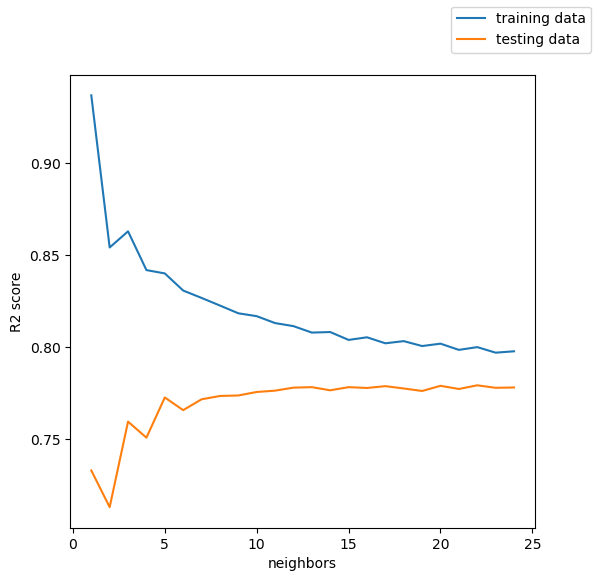

In [12]:
# Score with all numerical variables
getKNearestScores(data_train[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs','fam_income']], data_train['ismarried'],
                  data_test[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs','fam_income']], data_test['ismarried'])

In [13]:
# Score with all numerical variables using Cross Validation
getKNearestCVScores(data[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'fam_income']], data['ismarried'])

1:	0.7349283760893037
2:	0.7120517780377362
3:	0.761840911184713
4:	0.753244284520432
5:	0.7715599980509944
6:	0.7660942786447531
7:	0.7744195054520977
8:	0.7735867952409868
9:	0.7763740977147909
10:	0.7775504094344976
11:	0.7784191746124816
12:	0.7773152004834843
13:	0.7792879316013661
14:	0.7790708713324607
15:	0.7783831442129068
16:	0.7795051572900796
17:	0.7797041491300515
18:	0.7803558867955276
19:	0.7793783982203449
20:	0.779722219196805
21:	0.7789803916109228
22:	0.780048184660916
23:	0.7790708156465846
24:	0.7787813309825159
max score:  0.7803558867955276
neighbors = 18


Using the variables seen above, the score for "Is this individual married" peaked at .7795 where n=20 neighbors.

Decision Tree Classification is more effective than KNearest Neighbors when predicting if an individual is married. 
- (KNearest Score) .7795 < (Decision Tree Score) .8310